# Future forecasting

In [1]:
import pandas as pd
import os, sys
sys.path.insert(0,'../src/')
from market_forecast import load_trained_model,load_data,preprocess_data,generate_forecast,plot_all_forecasts,analyze_forecast 

**Step 1: Load the Trained Model and Data**

We will load the pre-trained LSTM model (lstm_model.h5) and the historical data for Tesla, SPY, and DND.

In [2]:
# Load the trained LSTM model
model = load_trained_model('../model/lstm_model.h5')


In [3]:
tesla_data = load_data('../data/TSLA_data.csv')
spy_data = load_data('../data/spy_data.csv')
dnd_data = load_data('../data/BND_data.csv')
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])
spy_data['Date'] = pd.to_datetime(spy_data['Date'])
dnd_data['Date'] = pd.to_datetime(dnd_data['Date'])

**Step 2: Preprocess the Data**

Preprocess the data to match the input format required by the LSTM model. This includes scaling the data and creating sequences.

In [4]:
# preprocess the data
sequence_length = 60  
X_tesla = preprocess_data(tesla_data, 'Close', sequence_length)
X_spy = preprocess_data(spy_data, 'Close', sequence_length)
X_dnd = preprocess_data(dnd_data, 'Close', sequence_length)


**Step 3: Generate Forecasts**

Use the trained LSTM model to generate forecasts for the next 6-12 months.

In [5]:

forecast_steps = 360  
sequence_length = 60  
tesla_forecast = generate_forecast(model, X_tesla,  forecast_steps, sequence_length)
spy_forecast = generate_forecast(model, X_spy,  forecast_steps, sequence_length)
dnd_forecast = generate_forecast(model, X_dnd,  forecast_steps, sequence_length)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━

**Step 4: Visualize the Forecast**

Plot the forecast alongside historical data and include confidence intervals.

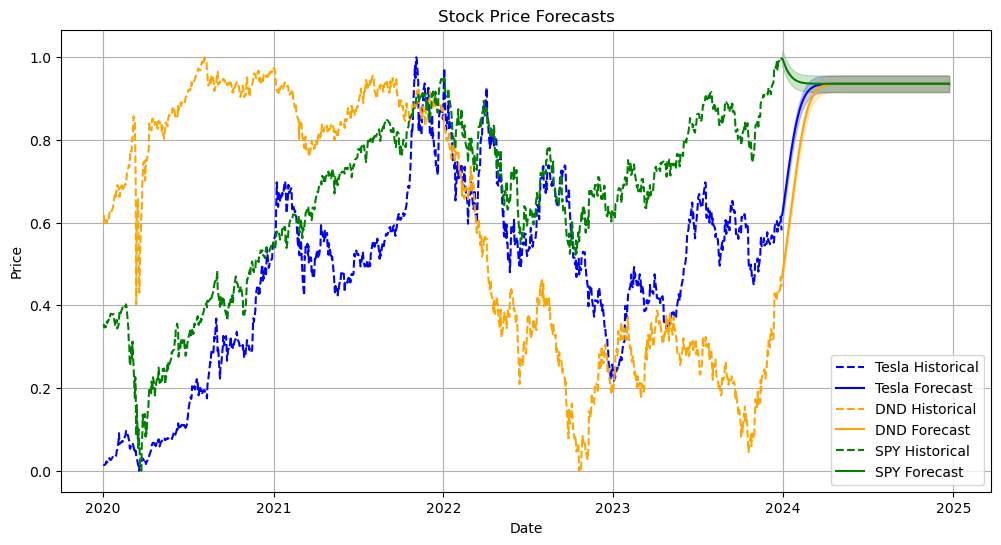

In [6]:
# forecasting tesla

historical_datasets = [tesla_data, dnd_data, spy_data]
forecasts = [tesla_forecast, dnd_forecast, spy_forecast]
company_names = ["Tesla", "DND", "SPY"]

plot_all_forecasts(historical_datasets, forecasts, confidence_interval=0.02, company_names=company_names)



**Step 5: Analyze the Forecast**

Interpret the results, identify trends, and discuss volatility and risks.

In [8]:

analyze_forecast(tesla_forecast, 0.2)

Trend Analysis: Upward trend observed.
Volatility: 0.06
Confidence Interval: ±0.2
Market Opportunity: Potential for price appreciation.


In [9]:
analyze_forecast(dnd_forecast, 0.2)

Trend Analysis: Upward trend observed.
Volatility: 0.10
Confidence Interval: ±0.2
Market Opportunity: Potential for price appreciation.


In [10]:
analyze_forecast(spy_forecast, 0.2)

Trend Analysis: Downward trend observed.
Volatility: 0.01
Confidence Interval: ±0.2
Market Risk: Potential for price decline.
